<a href="https://colab.research.google.com/github/zahra-ynp/MLOperation-FinalProject/blob/main/MLOperatin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Exploration and Validation

1.1: Load and Inspect the Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



# Load the dataset
file_path = "HR.csv"
data = pd.read_csv(file_path)

print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())



First 5 Rows of the Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  mediu

1.2 Handle Missing Values


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


1.3: Analyze and Visualize Features


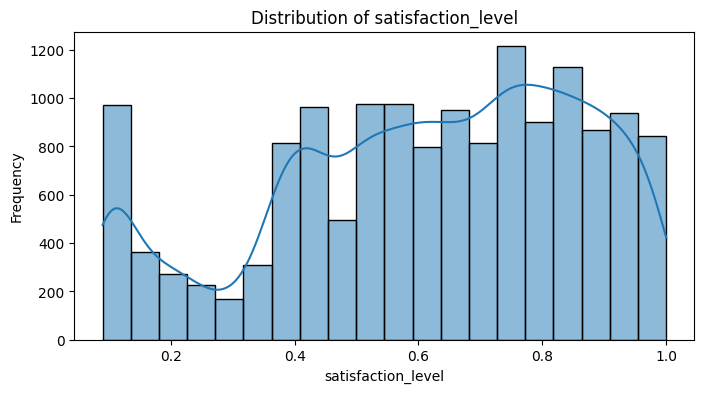

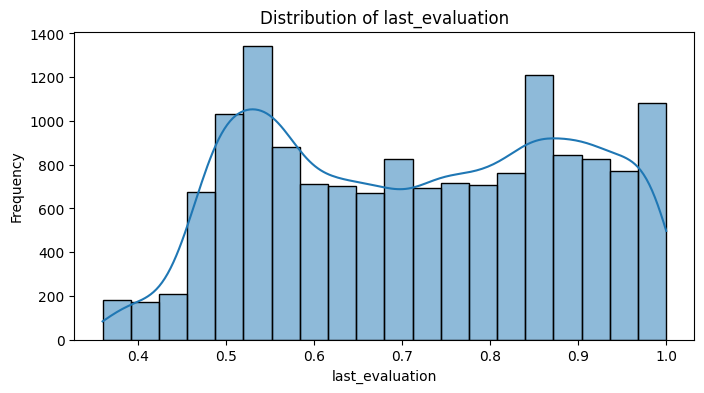

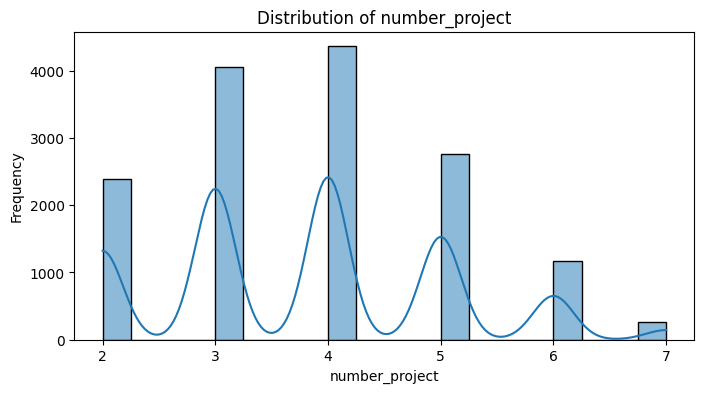

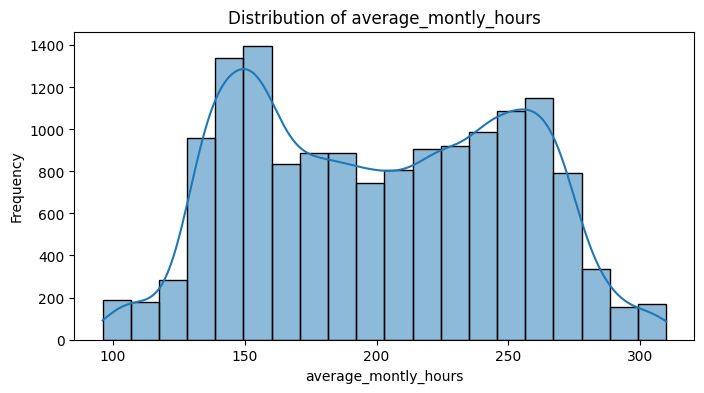

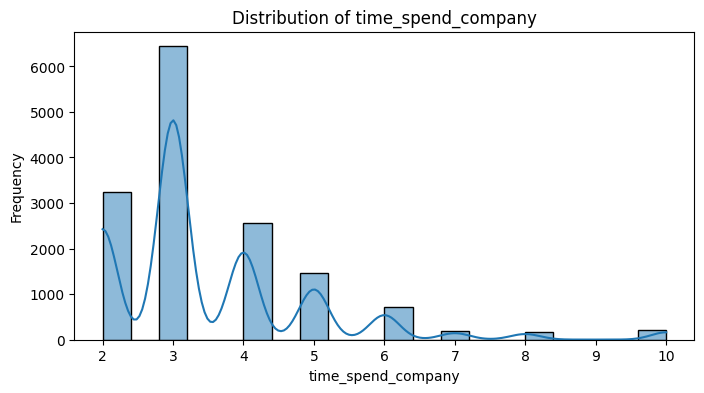

In [ ]:
# Numerical features
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


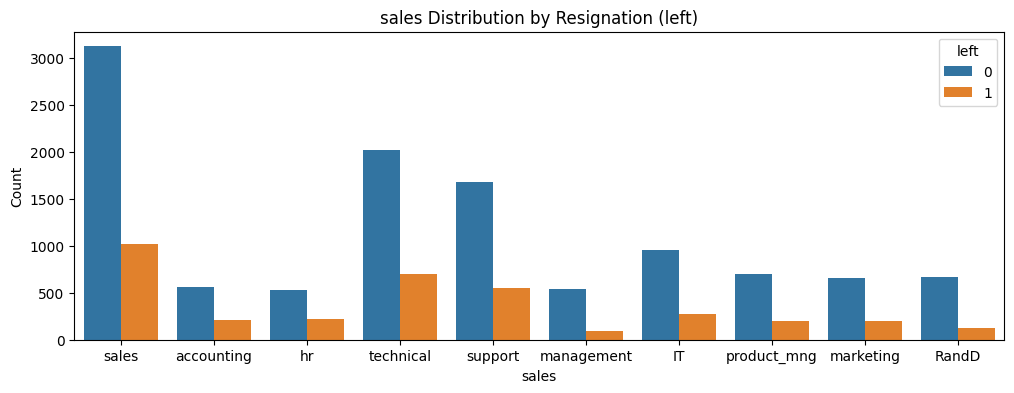

In [ ]:
# Categorical features
categorical_columns = ['sales', 'salary']
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=column, hue="left")  # "left" indicates resignation
    plt.title(f"{column} Distribution by Resignation (left)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Correlation heatmap for numerical features
ndata = data[data.columns[:-2]]
# print(ndata.head())

plt.figure(figsize=(10, 6))
correlation_matrix = ndata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


1.4: Check for Data Quality Issues

In [ ]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Outliers detection (boxplot)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Outliers in {column}")
    plt.xlabel(column)
    plt.show()


In [ ]:
# Check for inconsistencies in categorical columns
print("\nChecking for inconsistent values in categorical columns:")
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())

1.5: Target Variable Analysis

In [ ]:
# Check the balance of the target variable (left)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="left")
plt.title("Target Variable Distribution (Resignation)")
plt.xlabel("Resigned (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Step 2: Data Wrangling

2.1 Handle Missing Values

In [ ]:
# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
# plt.title("Missing Values Heatmap")
# plt.show()

#There is no missing value

2.2 Feature Engineering and Encoding

In [ ]:
# Encoding categorical variables

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[categorical_columns])

encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns)
encoded_data.index = data.index

# Drop original categorical columns and concatenate with encoded columns
data_encoded = data.drop(columns=categorical_columns).reset_index(drop=True)
data_final = pd.concat([data_encoded, encoded_data], axis=1)

print("\nData After Encoding:")
print(data_final.head())

2.3 Data Splitting

In [11]:
# Features (X) and Target (y)
X = data_final.drop('left', axis=1)
y = data_final['left']

# Step 1: Split into Training (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (10499, 20) (10499,)
Validation set: (2250, 20) (2250,)
Test set: (2250, 20) (2250,)
